In [11]:
import pandas as pd
import numpy as np
import re

In [12]:
climate_2023_df = pd.read_csv("../data/raw/daily_climate_2023.csv")
climate_2024_df = pd.read_csv("../data/raw/daily_climate_2024.csv")

In [13]:
display(climate_2023_df)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.94,43.17,HAMILTON A,6153193,2023-01-01,2023,1,1,NaN,3.9,...,0.0,T,0.6,NaN,NaN,NaN,NaN,M,NaN,M
1,-79.94,43.17,HAMILTON A,6153193,2023-01-02,2023,1,2,NaN,4.8,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M
2,-79.94,43.17,HAMILTON A,6153193,2023-01-03,2023,1,3,NaN,3.1,...,0.0,NaN,4.8,NaN,NaN,NaN,5.0,NaN,51.0,NaN
3,-79.94,43.17,HAMILTON A,6153193,2023-01-04,2023,1,4,NaN,3.0,...,0.0,NaN,16.6,NaN,NaN,NaN,5.0,NaN,60.0,NaN
4,-79.94,43.17,HAMILTON A,6153193,2023-01-05,2023,1,5,NaN,3.6,...,0.0,NaN,0.4,NaN,NaN,NaN,22.0,NaN,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-79.94,43.17,HAMILTON A,6153193,2023-12-27,2023,12,27,NaN,6.0,...,0.0,NaN,20.8,NaN,NaN,NaN,3.0,NaN,45.0,NaN
361,-79.94,43.17,HAMILTON A,6153193,2023-12-28,2023,12,28,NaN,6.1,...,0.0,NaN,3.0,NaN,NaN,NaN,NaN,M,NaN,M
362,-79.94,43.17,HAMILTON A,6153193,2023-12-29,2023,12,29,NaN,6.1,...,0.0,T,1.4,NaN,NaN,NaN,24.0,NaN,37.0,NaN
363,-79.94,43.17,HAMILTON A,6153193,2023-12-30,2023,12,30,NaN,2.2,...,0.0,T,0.0,T,NaN,NaN,NaN,M,NaN,M


In [14]:
display(climate_2024_df)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.94,43.17,HAMILTON A,6153193,2024-01-01,2024,1,1,NaN,-0.1,...,1.4,NaN,1.4,NaN,2.0,NaN,3.0,NaN,44.0,NaN
1,-79.94,43.17,HAMILTON A,6153193,2024-01-02,2024,1,2,NaN,0.2,...,0.0,T,0.0,T,1.0,NaN,22.0,NaN,53.0,NaN
2,-79.94,43.17,HAMILTON A,6153193,2024-01-03,2024,1,3,NaN,NaN,...,0.0,T,0.0,T,1.0,NaN,22.0,NaN,34.0,NaN
3,-79.94,43.17,HAMILTON A,6153193,2024-01-04,2024,1,4,NaN,-0.3,...,0.0,T,0.0,T,0.0,T,32.0,NaN,50.0,NaN
4,-79.94,43.17,HAMILTON A,6153193,2024-01-05,2024,1,5,NaN,-1.5,...,0.0,T,0.0,T,0.0,T,24.0,NaN,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-79.94,43.17,HAMILTON A,6153193,2024-12-27,2024,12,27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,-79.94,43.17,HAMILTON A,6153193,2024-12-28,2024,12,28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,-79.94,43.17,HAMILTON A,6153193,2024-12-29,2024,12,29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,-79.94,43.17,HAMILTON A,6153193,2024-12-30,2024,12,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Merge the two datasets using vertical concatenation
merged_climate_df = pd.concat([climate_2023_df, climate_2024_df], ignore_index=True)


In [16]:
merged_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              731 non-null    float64
 1   Latitude (y)               731 non-null    float64
 2   Station Name               731 non-null    object 
 3   Climate ID                 731 non-null    int64  
 4   Date/Time                  731 non-null    object 
 5   Year                       731 non-null    int64  
 6   Month                      731 non-null    int64  
 7   Day                        731 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              656 non-null    float64
 10  Max Temp Flag              52 non-null     object 
 11  Min Temp (°C)              656 non-null    float64
 12  Min Temp Flag              52 non-null     object 
 13  Mean Temp (°C)             656 non-null    float64

In [17]:
# Function to convert column names to snake case and avoid double underscores
def to_snake_case(column_name):
    column_name = re.sub(r'([A-Z])', r'_\1', column_name)    # Insert underscores before uppercase letters
    column_name = re.sub(r'\s+', '_', column_name)           # Replace spaces with underscores
    column_name = re.sub(r'[^a-zA-Z0-9_]', '', column_name)  # Remove special characters
    column_name = re.sub(r'_+', '_', column_name)            # Replace multiple underscores with a single underscore
    column_name = column_name.lower().strip('_')             # Convert to lowercase and strip leading/trailing underscores
    return column_name

In [18]:
# Apply the function to all column names
merged_climate_df.columns = [to_snake_case(col) for col in merged_climate_df.columns]

# Display updated column names
merged_climate_df.columns

Index(['longitude_x', 'latitude_y', 'station_name', 'climate_i_d', 'date_time',
       'year', 'month', 'day', 'data_quality', 'max_temp_c', 'max_temp_flag',
       'min_temp_c', 'min_temp_flag', 'mean_temp_c', 'mean_temp_flag',
       'heat_deg_days_c', 'heat_deg_days_flag', 'cool_deg_days_c',
       'cool_deg_days_flag', 'total_rain_mm', 'total_rain_flag',
       'total_snow_cm', 'total_snow_flag', 'total_precip_mm',
       'total_precip_flag', 'snow_on_grnd_cm', 'snow_on_grnd_flag',
       'dir_of_max_gust_10s_deg', 'dir_of_max_gust_flag',
       'spd_of_max_gust_kmh', 'spd_of_max_gust_flag'],
      dtype='object')

In [19]:
# dropping irrelevant columns
# List of columns to keep
columns_to_keep = ['date_time', 'mean_temp_c', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'spd_of_max_gust_kmh']

# Overwrite the existing DataFrame with only the selected columns
merged_climate_df = merged_climate_df[columns_to_keep]

In [20]:
display(merged_climate_df)

,date_time,mean_temp_c,total_rain_mm,total_snow_cm,total_precip_mm,spd_of_max_gust_kmh
0,2023-01-01,2.9,0.6,0.0,0.6,NaN
1,2023-01-02,1.8,0.0,0.0,0.0,NaN
2,2023-01-03,1.7,4.8,0.0,4.8,51.0
3,2023-01-04,2.6,16.6,0.0,16.6,60.0
4,2023-01-05,2.3,0.4,0.0,0.4,36.0
...,...,...,...,...,...,...
726,2024-12-27,NaN,NaN,NaN,NaN,NaN
727,2024-12-28,NaN,NaN,NaN,NaN,NaN
728,2024-12-29,NaN,NaN,NaN,NaN,NaN
729,2024-12-30,NaN,NaN,NaN,NaN,NaN


In [21]:
# Convert total_snow_cm to millimeters
merged_climate_df['total_snow_mm'] = merged_climate_df['total_snow_cm'] * 10

# Optional: Drop the original total_snow_cm column if no longer needed
merged_climate_df.drop('total_snow_cm', axis=1, inplace=True)

In [22]:
display(merged_climate_df)

,date_time,mean_temp_c,total_rain_mm,total_precip_mm,spd_of_max_gust_kmh,total_snow_mm
0,2023-01-01,2.9,0.6,0.6,NaN,0.0
1,2023-01-02,1.8,0.0,0.0,NaN,0.0
2,2023-01-03,1.7,4.8,4.8,51.0,0.0
3,2023-01-04,2.6,16.6,16.6,60.0,0.0
4,2023-01-05,2.3,0.4,0.4,36.0,0.0
...,...,...,...,...,...,...
726,2024-12-27,NaN,NaN,NaN,NaN,NaN
727,2024-12-28,NaN,NaN,NaN,NaN,NaN
728,2024-12-29,NaN,NaN,NaN,NaN,NaN
729,2024-12-30,NaN,NaN,NaN,NaN,NaN


In [23]:
merged_climate_df.rename(columns = {'date_time': 'date'}, inplace = True)

In [24]:
display(merged_climate_df)

,date,mean_temp_c,total_rain_mm,total_precip_mm,spd_of_max_gust_kmh,total_snow_mm
0,2023-01-01,2.9,0.6,0.6,NaN,0.0
1,2023-01-02,1.8,0.0,0.0,NaN,0.0
2,2023-01-03,1.7,4.8,4.8,51.0,0.0
3,2023-01-04,2.6,16.6,16.6,60.0,0.0
4,2023-01-05,2.3,0.4,0.4,36.0,0.0
...,...,...,...,...,...,...
726,2024-12-27,NaN,NaN,NaN,NaN,NaN
727,2024-12-28,NaN,NaN,NaN,NaN,NaN
728,2024-12-29,NaN,NaN,NaN,NaN,NaN
729,2024-12-30,NaN,NaN,NaN,NaN,NaN


<Axes: >

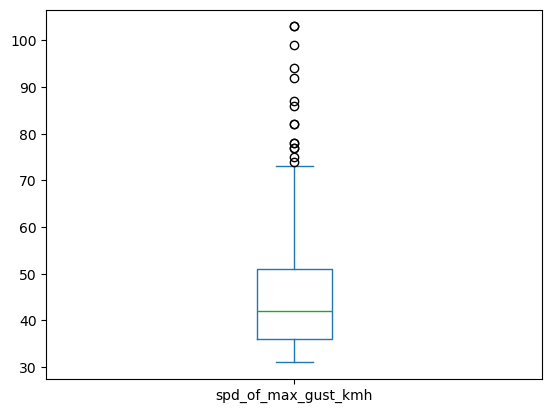

In [25]:
merged_climate_df['spd_of_max_gust_kmh'].plot(kind='box')


In [26]:
# Dropping irrelevant columns
merged_climate_df.drop(columns = ['spd_of_max_gust_kmh'], inplace = True)

In [27]:
display(merged_climate_df)

,date,mean_temp_c,total_rain_mm,total_precip_mm,total_snow_mm
0,2023-01-01,2.9,0.6,0.6,0.0
1,2023-01-02,1.8,0.0,0.0,0.0
2,2023-01-03,1.7,4.8,4.8,0.0
3,2023-01-04,2.6,16.6,16.6,0.0
4,2023-01-05,2.3,0.4,0.4,0.0
...,...,...,...,...,...
726,2024-12-27,NaN,NaN,NaN,NaN
727,2024-12-28,NaN,NaN,NaN,NaN
728,2024-12-29,NaN,NaN,NaN,NaN
729,2024-12-30,NaN,NaN,NaN,NaN


In [28]:
# Convert the 'date' column to datetime format
merged_climate_df['date'] = pd.to_datetime(merged_climate_df['date'])

In [29]:
# Filter rows to keep only those up to and including 2024-12-08
merged_climate_df = merged_climate_df[merged_climate_df['date'] <= '2024-12-08']

In [30]:
display(merged_climate_df)

,date,mean_temp_c,total_rain_mm,total_precip_mm,total_snow_mm
0,2023-01-01,2.9,0.6,0.6,0.0
1,2023-01-02,1.8,0.0,0.0,0.0
2,2023-01-03,1.7,4.8,4.8,0.0
3,2023-01-04,2.6,16.6,16.6,0.0
4,2023-01-05,2.3,0.4,0.4,0.0
...,...,...,...,...,...
703,2024-12-04,-1.0,0.0,3.4,44.0
704,2024-12-05,-3.8,0.0,0.6,10.0
705,2024-12-06,-7.6,0.0,0.0,0.0
706,2024-12-07,0.4,0.0,0.3,3.0


In [32]:
#check for duplicate rows
duplicates = merged_climate_df.duplicated().sum()
if duplicates > 0:
    print(f"\nThere are {duplicates} duplicate rows in the DataFrame.")
else:
    print("\nNo duplicate rows found in the DataFrame.")


No duplicate rows found in the DataFrame.


In [33]:
merged_climate_df.isna().sum()

date                0
mean_temp_c        52
total_rain_mm       7
total_precip_mm     7
total_snow_mm       7
dtype: int64

In [34]:
# Set 'date' as the index for time-based interpolation
merged_climate_df.set_index('date', inplace=True)

# Perform time-based interpolation for all numeric columns with missing values
merged_climate_df.interpolate(method='time', inplace=True)

# Optional: Reset the index if you want 'date' back as a regular column
merged_climate_df.reset_index(inplace=True)


In [35]:
merged_climate_df.isna().sum()

date               0
mean_temp_c        0
total_rain_mm      0
total_precip_mm    0
total_snow_mm      0
dtype: int64

In [36]:
display(merged_climate_df)

,date,mean_temp_c,total_rain_mm,total_precip_mm,total_snow_mm
0,2023-01-01,2.9,0.6,0.6,0.0
1,2023-01-02,1.8,0.0,0.0,0.0
2,2023-01-03,1.7,4.8,4.8,0.0
3,2023-01-04,2.6,16.6,16.6,0.0
4,2023-01-05,2.3,0.4,0.4,0.0
...,...,...,...,...,...
703,2024-12-04,-1.0,0.0,3.4,44.0
704,2024-12-05,-3.8,0.0,0.6,10.0
705,2024-12-06,-7.6,0.0,0.0,0.0
706,2024-12-07,0.4,0.0,0.3,3.0


In [37]:
merged_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             708 non-null    datetime64[ns]
 1   mean_temp_c      708 non-null    float64       
 2   total_rain_mm    708 non-null    float64       
 3   total_precip_mm  708 non-null    float64       
 4   total_snow_mm    708 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 27.8 KB


In [38]:
# Reset the index and drop the old index
merged_climate_df.reset_index(drop=True, inplace=True)


In [39]:
merged_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             708 non-null    datetime64[ns]
 1   mean_temp_c      708 non-null    float64       
 2   total_rain_mm    708 non-null    float64       
 3   total_precip_mm  708 non-null    float64       
 4   total_snow_mm    708 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 27.8 KB
